In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np

## White Noise

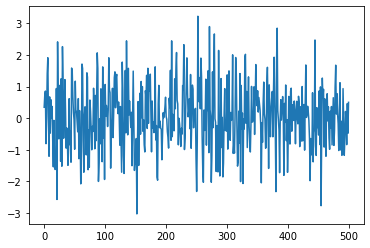

In [2]:
wn = np.random.normal(0,1,500)
plt.plot(wn)

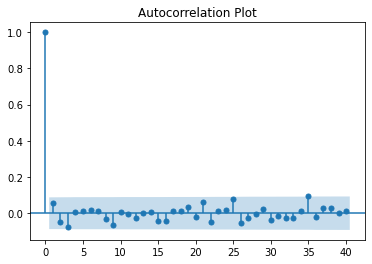

In [3]:
p =plot_acf(wn, lags=40,title='Autocorrelation Plot')

# Load Data

In [4]:
from statsmodels.datasets import co2
simple_co2_data = pd.DataFrame(co2.load().data)
simple_co2_data.fillna(method='bfill', inplace=True)

In [5]:
alpha = 0.05

### Is this time series stationary?

<AxesSubplot:>

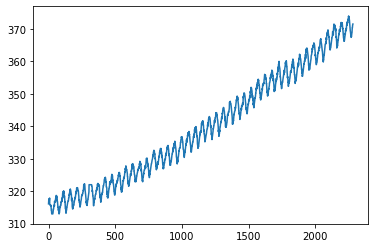

In [6]:
simple_co2_data['co2'].plot()

In [7]:
simple_co2_data.head(2)

,index,co2
0,1958-03-29,316.1
1,1958-04-05,317.3


In [8]:
simple_co2_data = simple_co2_data.set_index(simple_co2_data['index'], drop=True)
simple_co2_data.head(2)

,index,co2
index,,
1958-03-29,1958-03-29,316.1
1958-04-05,1958-04-05,317.3


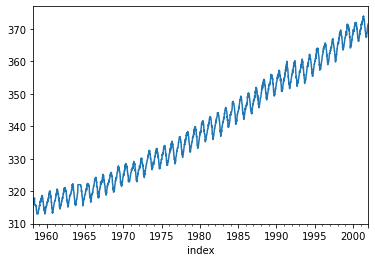

In [9]:
simple_co2_data['co2'].plot()
plt.show()

# Non-Stationarity Data

## AD Fuller Test

In [10]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [11]:
adf_test(simple_co2_data['co2'])

Results of Dickey-Fuller Test:
Test Statistic                    0.012154
p-value                           0.959526
#Lags Used                       27.000000
Number of Observations Used    2256.000000
Critical Value (1%)              -3.433252
Critical Value (5%)              -2.862822
Critical Value (10%)             -2.567452
dtype: float64


In [12]:
ad_fuller_results = adfuller(simple_co2_data['co2'])
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

stationarity from ad_fuller test: False


## KPSS Test

In [13]:
#define KPSS
def kpss_test(timeseries, trend='c'):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression=trend)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [14]:
kpss_test(simple_co2_data['co2'])

Results of KPSS Test:
Test Statistic            8.182571
p-value                   0.010000
Lags Used                27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/Users/John_Navarro/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [15]:
kpss_test(simple_co2_data['co2'], trend='ct')

Results of KPSS Test:
Test Statistic            1.23919
p-value                   0.01000
Lags Used                27.00000
Critical Value (10%)      0.11900
Critical Value (5%)       0.14600
Critical Value (2.5%)     0.17600
Critical Value (1%)       0.21600
dtype: float64


/Users/John_Navarro/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [16]:
kpss_test_results = kpss(simple_co2_data['co2'])
kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

stationarity from KPSS test: False


/Users/John_Navarro/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## ACF Plot

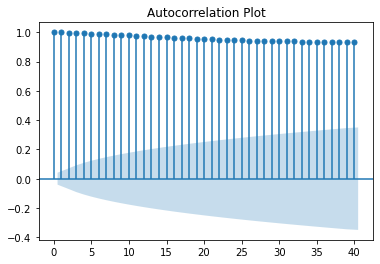

In [17]:
p = plot_acf(simple_co2_data['co2'], lags=40, title='Autocorrelation Plot')

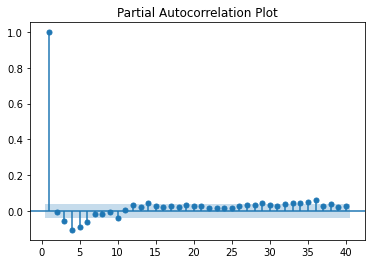

In [18]:
p = plot_pacf(simple_co2_data['co2'], lags=40, title='Partial Autocorrelation Plot', zero=False)

# Stationarity Data - Taking a Difference

In [19]:
differenced_co2_data = (simple_co2_data['co2']-simple_co2_data['co2'].shift()).iloc[1:]

<AxesSubplot:xlabel='index'>

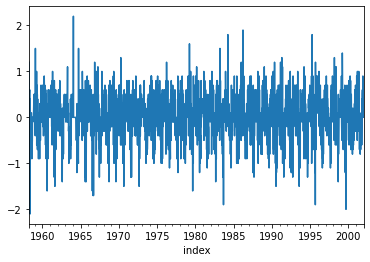

In [20]:
differenced_co2_data.plot()

## AD Fuller Test

In [21]:
adf_test(differenced_co2_data)

Results of Dickey-Fuller Test:
Test Statistic                -1.565460e+01
p-value                        1.581093e-28
#Lags Used                     2.700000e+01
Number of Observations Used    2.255000e+03
Critical Value (1%)           -3.433253e+00
Critical Value (5%)           -2.862823e+00
Critical Value (10%)          -2.567453e+00
dtype: float64


In [22]:
ad_fuller_results = adfuller(differenced_co2_data)
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

stationarity from ad_fuller test: True


## KPSS Test

In [23]:
kpss_test(differenced_co2_data)

Results of KPSS Test:
Test Statistic            0.019616
p-value                   0.100000
Lags Used                27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/Users/John_Navarro/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [24]:
kpss_test_results = kpss(differenced_co2_data)
kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

stationarity from KPSS test: True


/Users/John_Navarro/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## ACF Plot

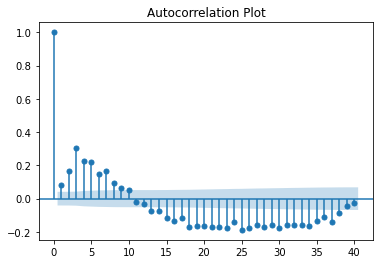

In [25]:
p = plot_acf(differenced_co2_data, lags=40, title='Autocorrelation Plot')

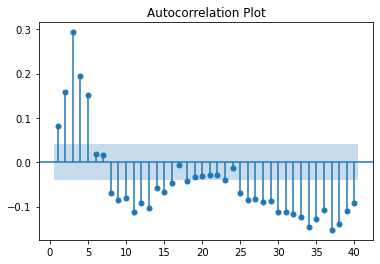

In [26]:
p = plot_pacf(differenced_co2_data, lags=40, zero=False,title='Autocorrelation Plot')